In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_log_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data/train.csv')
df = df.drop(columns='id')
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
# How does RMSLE work?
x1 = [1000,1000,1000]
x2 = [3000,300,3000]
root_mean_squared_log_error(x1, x2)

1.1335667408121965

In [5]:
# Cross-val: using mean to predict
model = LinearRegression()
res = cross_validate(estimator=model, X=np.ones((len(df), 1)), y=df['Premium Amount'], scoring='neg_root_mean_squared_log_error')

-np.mean(res['test_score'])

1.1708492200445297

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


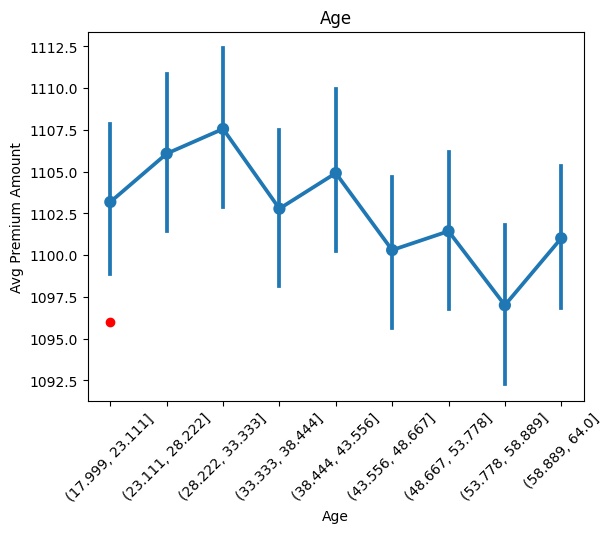

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


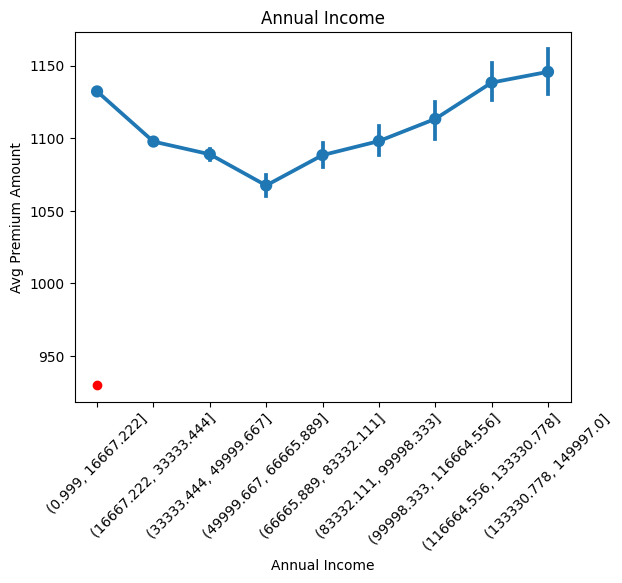

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


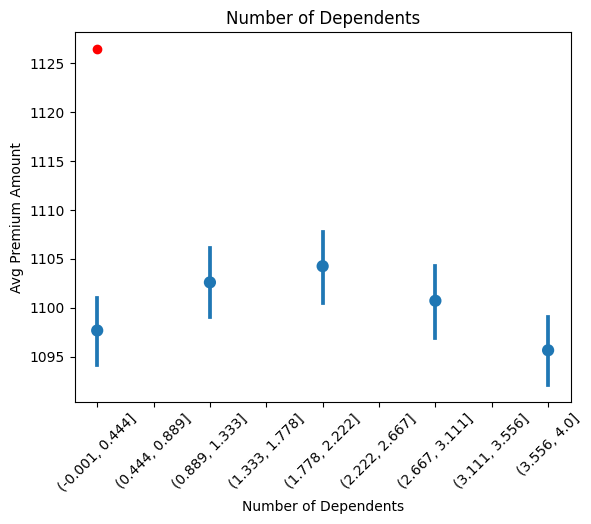

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


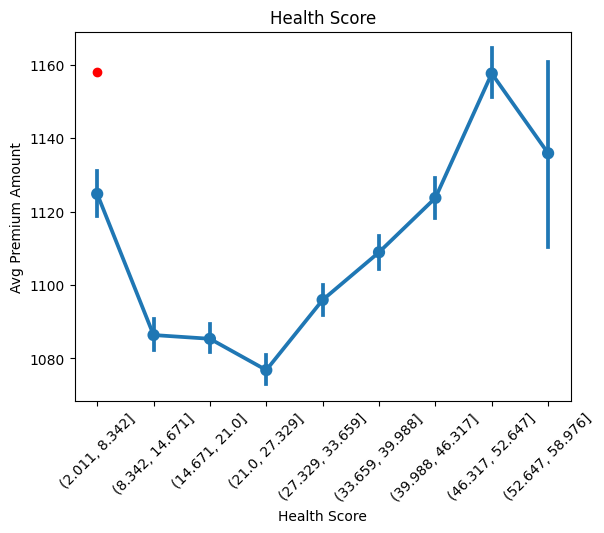

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


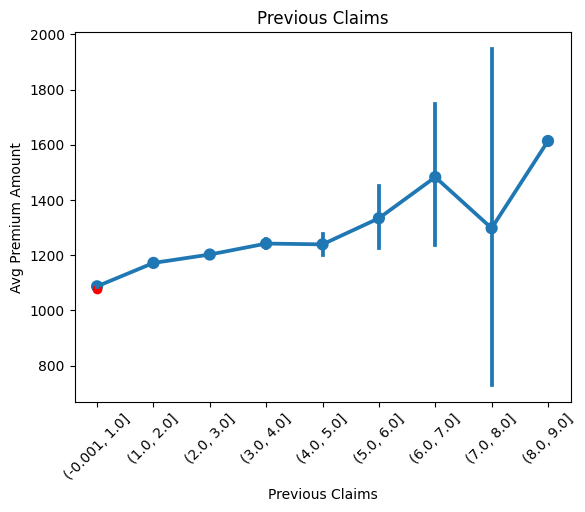

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


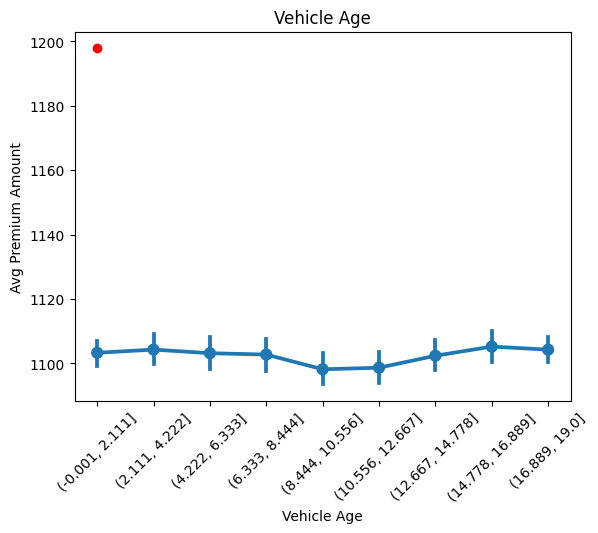

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


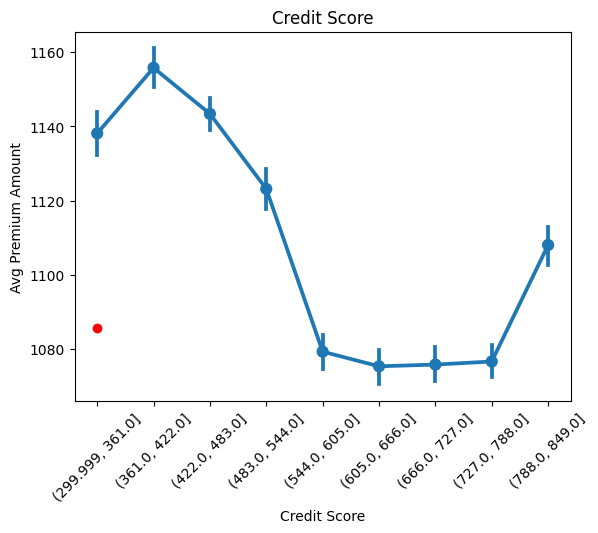

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


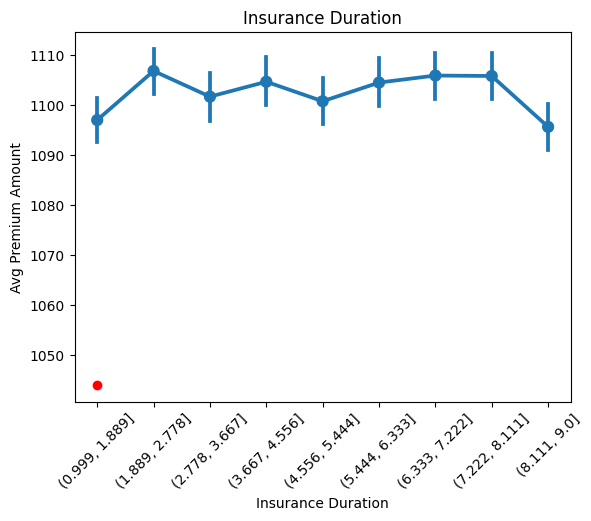

/Users/akhilkammila/miniconda3/envs/tradingClub/lib/python3.12/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


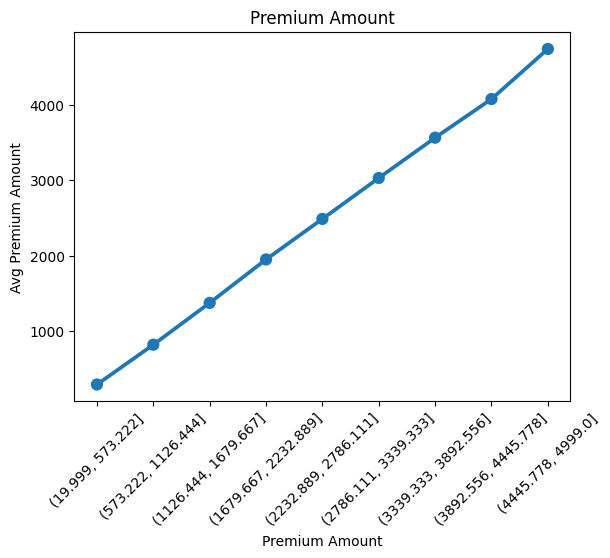

In [43]:
# Explore binning by different vars --> plotting

def binned_plots(data, colName):
    minScore = data[colName].min()
    maxScore = data[colName].max()
    bins = np.linspace(minScore, maxScore, 10)
    binnedCol = pd.cut(df[colName], bins=bins, include_lowest=True)

    sns.pointplot(x=binnedCol, y=df['Premium Amount'])
    plt.xticks(rotation=45)

    naMean = df[df[colName].isna()]['Premium Amount'].mean()
    plt.scatter(x=0, y=naMean, color='red')

    plt.title(colName)
    plt.ylabel('Avg Premium Amount')
    plt.show()

for col in df.select_dtypes('number').columns:
    binned_plots(df, col)


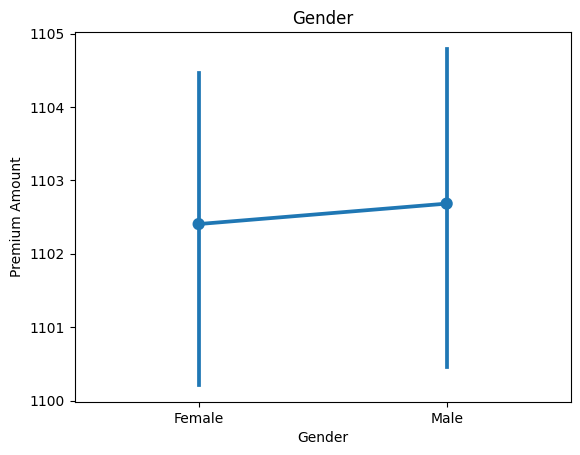

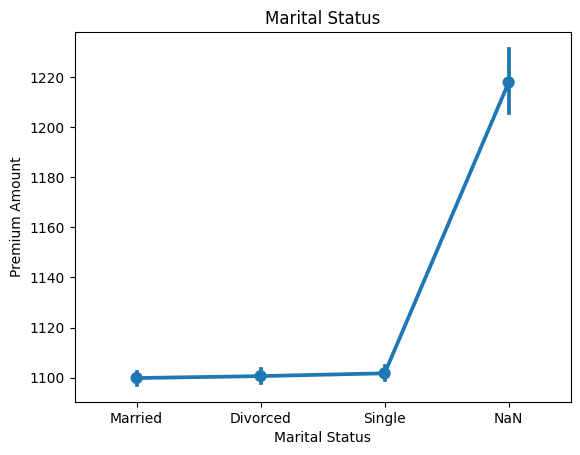

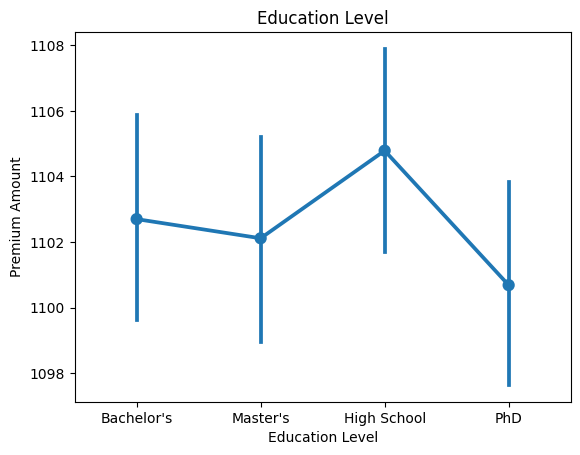

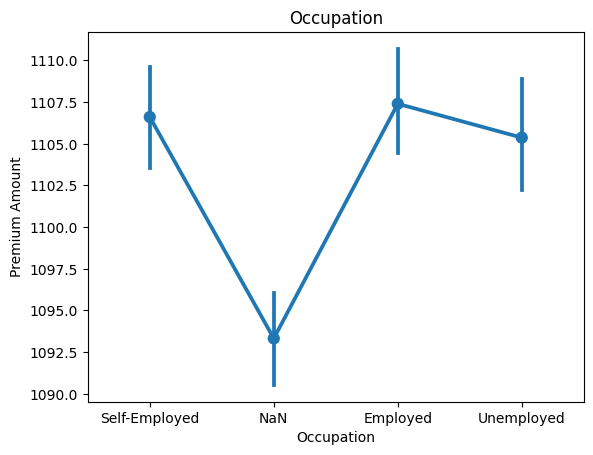

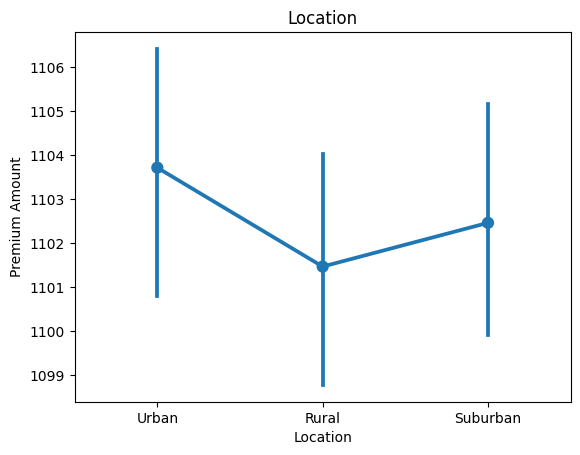

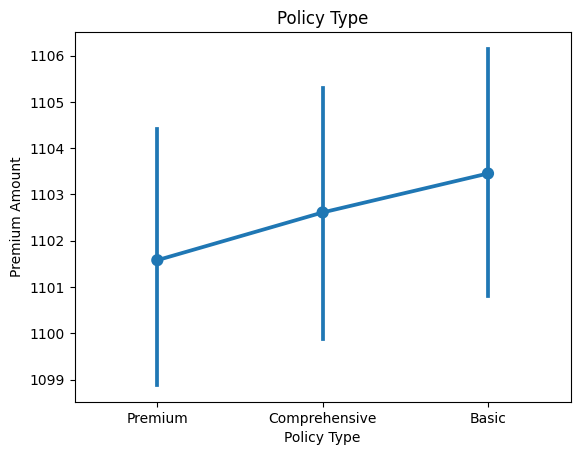

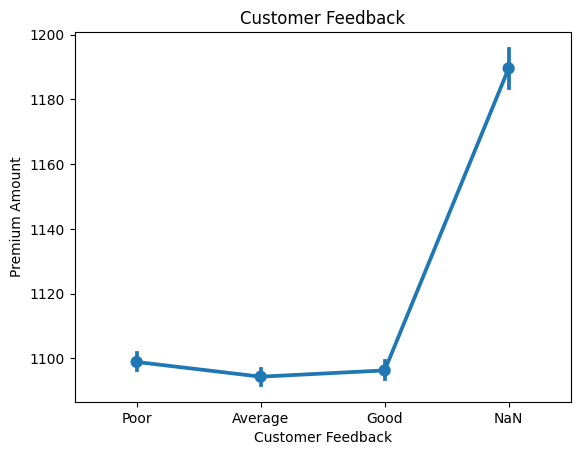

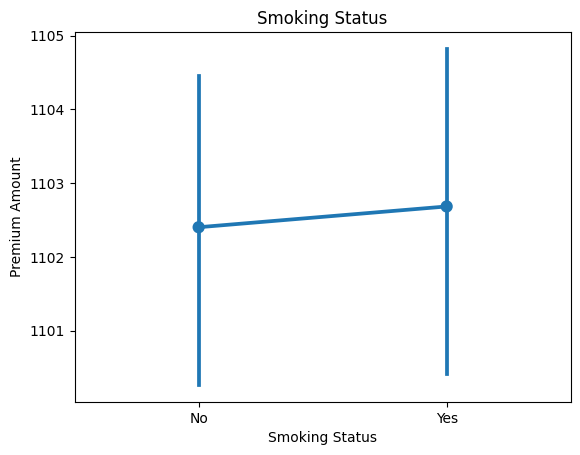

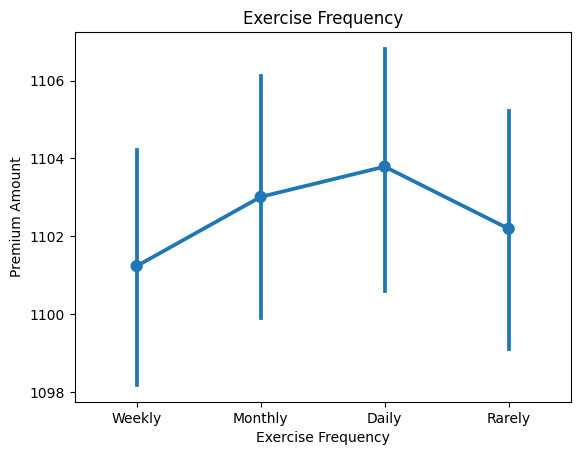

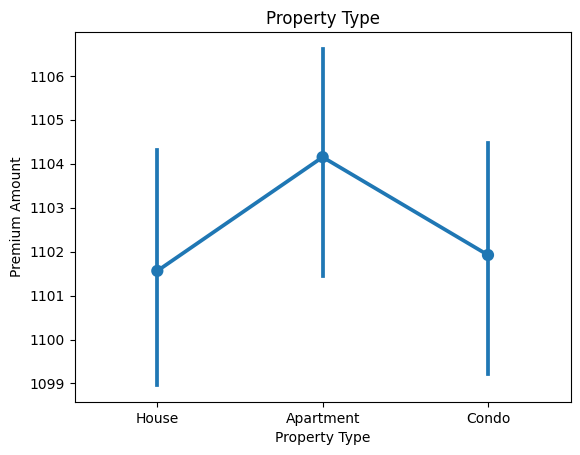

In [7]:
def plot_categorical(data, colName):
    filledData = data[colName].fillna(value='NaN')
    sns.pointplot(x=filledData, y=data['Premium Amount'])
                  
    plt.title(colName)
    plt.show()

numericalNames = df.select_dtypes('number').columns
for colName in df.columns:
    if colName in numericalNames: continue
    if colName == 'Policy Start Date': continue
    plot_categorical(df, colName)

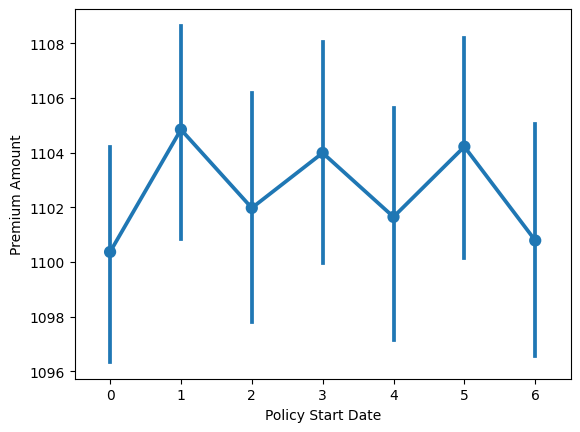

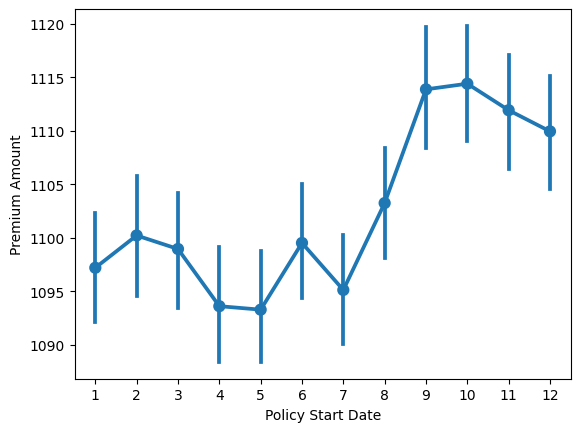

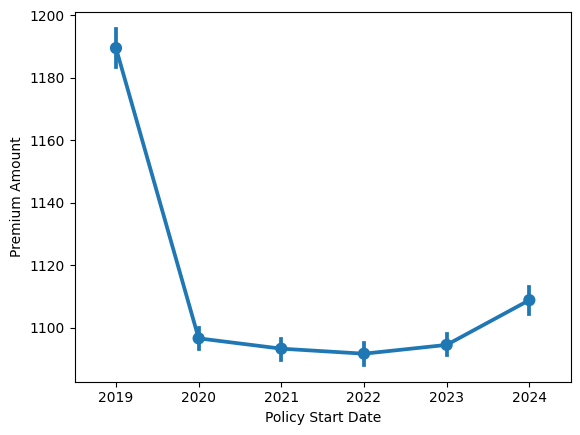

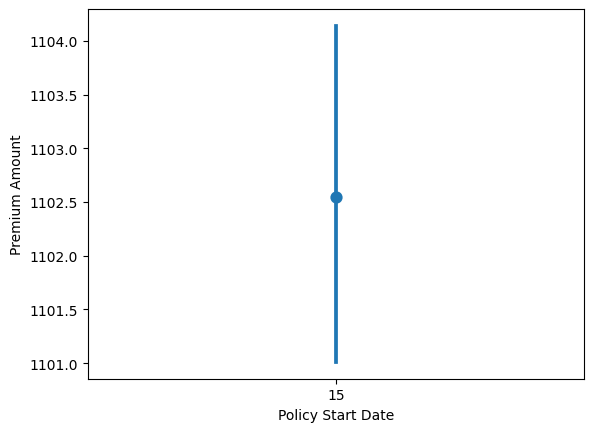

In [54]:
# Time
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
dayOfWeek = df['Policy Start Date'].dt.day_of_week
month = df['Policy Start Date'].dt.month
year = df['Policy Start Date'].dt.year
hour = df['Policy Start Date'].dt.hour

for timeseries in [dayOfWeek, month, year, hour]:
    sns.pointplot(x=timeseries, y=df['Premium Amount'])
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, '2019-08'),
  Text(1, 0, '2019-09'),
  Text(2, 0, '2019-10'),
  Text(3, 0, '2019-11'),
  Text(4, 0, '2019-12'),
  Text(5, 0, '2020-01'),
  Text(6, 0, '2020-02'),
  Text(7, 0, '2020-03'),
  Text(8, 0, '2020-04'),
  Text(9, 0, '2020-05'),
  Text(10, 0, '2020-06'),
  Text(11, 0, '2020-07'),
  Text(12, 0, '2020-08'),
  Text(13, 0, '2020-09'),
  Text(14, 0, '2020-10'),
  Text(15, 0, '2020-11'),
  Text(16, 0, '2020-12'),
  Text(17, 0, '2021-01'),
  Text(18, 0, '2021-02'),
  Text(19, 0, '2021-03'),
  Text(20, 0, '2021-04'),
  Text(21, 0, '2021-05'),
  Text(22, 0, '2021-06'),
  Text(23, 0, '2021-07'),
  Text(24, 0, '2021-08'),
  Text(25, 0, '2021-09'),
  Text(26, 0, '2021-10'),
  Text(27, 0, '2021-11'),
  Te

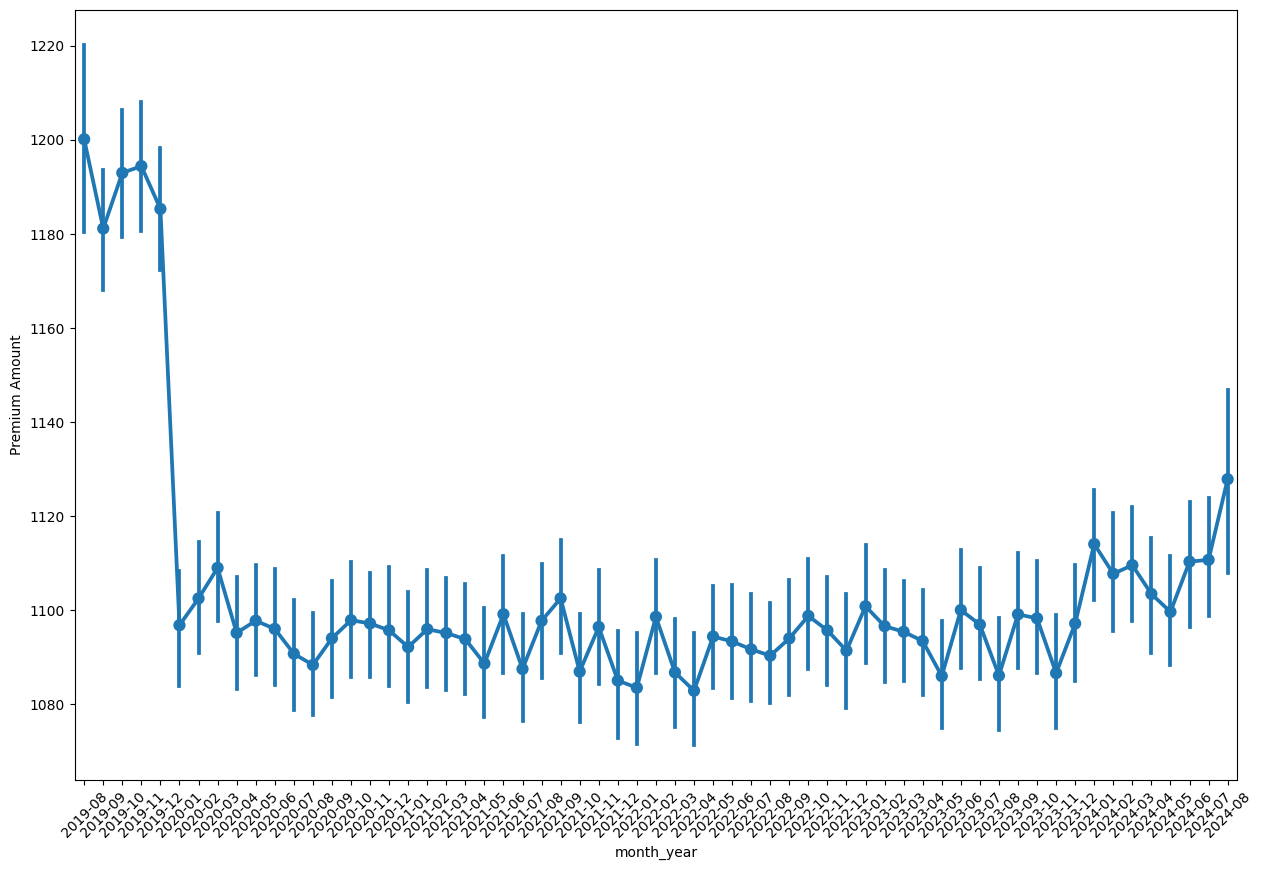

In [86]:
# res = df.groupby(by=[df['Policy Start Date'].dt.month, df['Policy Start Date'].dt.year])['Premium Amount'].mean()
fig = plt.figure(figsize=(15,10))
timeseries_df = df[['Policy Start Date','Premium Amount']].copy()
timeseries_df['month_year'] = df['Policy Start Date'].dt.to_period('M')
timeseries_df = timeseries_df.sort_values('month_year')


sns.pointplot(x=timeseries_df['month_year'], y=df['Premium Amount'])
plt.xticks(rotation=45)